Linear Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

dw = -2/n (sum 0 to n) xi (yi- yi pred)

db = -2/n (sum 0 to n) (yi- yi pred)

In [54]:
import numpy as np

say the linear regression is stored in **Lin_Reg_model.py**

then 

upload the py file in colab

import Lin_Reg_model

then no need of the code below

then 

line 63 : Lin_Reg_model.Linear_Regrerssion(...)

**Linear regression**

In [55]:
#can store this code in a separate python file and use it in multiple 
#places by loading it
class Linear_Regression():
   #initializing the parameters - learning rate and no of iter
   def __init__(self, learning_rate, no_iter): #no_iter=no of iterations
     #self 1st parameter. It represents an instance of the class
     self.learning_rate = learning_rate
     self.no_iter = no_iter
  
   def fit(self, X,Y):
     self.m, self.n = X.shape  #no of rows and cols
     #initializing weights and bias
     self.w = np.zeros(self.n)  #array for weights with these cols, all vals contained=0
     self.b = 0   #bias value 
     self.X = X
     self.Y = Y
    
     #implementing gradient descent

     for i in range (self.no_iter):
       self.update_weights()
    
   def update_weights(self):
      Y_prediction = self.predict(self.X)
      #returns the predicted value  --> y=wx+b (linear)

      # calculate gradients

      dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
      #

      db = - 2 * np.sum(self.Y - Y_prediction)/self.m
      # upadating the weights
    
      self.w = self.w - self.learning_rate*dw
      self.b = self.b - self.learning_rate*db

      

   def predict(self, X):
     return X.dot(self.w) + self.b
     #Y = wX+b





Using Linear Regression model for prediction

In [56]:
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#import Lin_Reg_model


Data preprocessing

In [57]:
salary_data = pd.read_csv('/content/salary_data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [58]:
salary_data.shape

(30, 2)

In [59]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting the feature and target

In [60]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [61]:
print(X)
print('________')
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
________
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting into training and test data

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33,
                                                     random_state = 2 )

Train the linear regression model

In [63]:
model = Linear_Regression(learning_rate=0.01, no_iter=1000)

In [64]:
model.fit(X_train, Y_train)

In [67]:
#print the parameters 
print('Weight = ',model.w[0])
print('Bias = ', model.b)

Weight =  9580.301196603597
Bias =  23226.38946603212


Predict the salary value for test data

In [70]:
print(X_test)
print('________________')
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[[1.3]
 [1.1]
 [4.5]
 [3.7]
 [7.1]
 [6. ]
 [8.2]
 [3. ]
 [2. ]
 [6.8]]
________________
[ 35680.78102162  33764.7207823   66337.74485075  58673.50389347
  91246.52796192  80708.19664565 101784.85927818  51967.29305584
  42386.99185924  88372.43760294]


y=9514x+23697

salary = 9514*experience + 23697 

Visualizing the predicted values and actual values 

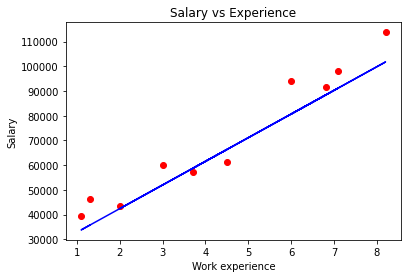

In [69]:
plt.scatter (X_test, Y_test, color ='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel('Work experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()